# 개요

`1` Fine Watch의 행동 데이터 분류 AI 모델링 요청

`2` 출시될 시제품에서 수집한 데이터를 바탕으로 6가지 행동 검토 후 `계단오르기`를 분류할 수 있는 AI 모델 생성 및 중요도 상위 Feature 선별

* 6가지 행동 패턴 : STANDING, SITTING, LAYING, WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS

`3` 데이터 설명

* Fine Watch 23 시제품에서 수집한 데이터

* 가속도 센서 데이터 : 일직선으로 움직이는 물체의 선형가속도를 측정하는 센서 데이터

* 자이로스코프 센서 데이터 : 회전하는 물체의 각속도를 측정하는 센서 데이터

# 0. import

In [29]:
# | code-fold : true
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import os
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook_connected"

from sklearn.model_selection import train_test_split
from sklearn.metrics import *

plt.rc('font', family='Malgun Gothic')

# 1. 데이터 로드

In [4]:
data = pd.read_csv("data.csv")
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.816696,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,21,STANDING
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.693515,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,15,LAYING
2,0.278709,-0.014511,-0.108717,-0.997720,-0.981088,-0.994008,-0.997934,-0.982187,-0.995017,-0.942584,...,-0.829311,0.000265,-0.525022,-0.891875,0.021528,-0.833564,0.202434,-0.032755,11,STANDING
3,0.289795,-0.035536,-0.150354,-0.231727,-0.006412,-0.338117,-0.273557,0.014245,-0.347916,0.008288,...,-0.408956,-0.255125,0.612804,0.747381,-0.072944,-0.695819,0.287154,0.111388,17,WALKING
4,0.394807,0.034098,0.091229,0.088489,-0.106636,-0.388502,-0.010469,-0.109680,-0.346372,0.584131,...,-0.563437,-0.044344,-0.845268,-0.974650,-0.887846,-0.705029,0.264952,0.137758,17,WALKING_DOWNSTAIRS


`-` 불필요한 컬럼 제거

In [5]:
data.drop("subject", axis = 1,inplace = True)

# 2. 기초정보확인

In [6]:
data.shape

(5881, 562)

In [7]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.487737,-0.816696,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,STANDING
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.237820,-0.693515,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,LAYING
2,0.278709,-0.014511,-0.108717,-0.997720,-0.981088,-0.994008,-0.997934,-0.982187,-0.995017,-0.942584,...,-0.535287,-0.829311,0.000265,-0.525022,-0.891875,0.021528,-0.833564,0.202434,-0.032755,STANDING
3,0.289795,-0.035536,-0.150354,-0.231727,-0.006412,-0.338117,-0.273557,0.014245,-0.347916,0.008288,...,-0.004012,-0.408956,-0.255125,0.612804,0.747381,-0.072944,-0.695819,0.287154,0.111388,WALKING
4,0.394807,0.034098,0.091229,0.088489,-0.106636,-0.388502,-0.010469,-0.109680,-0.346372,0.584131,...,-0.157832,-0.563437,-0.044344,-0.845268,-0.974650,-0.887846,-0.705029,0.264952,0.137758,WALKING_DOWNSTAIRS


In [10]:
#data.info(verbose=True, show_counts=True)

`-` 기초 통계량 확인

In [11]:
data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,...,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000
mean,0.274811,-0.017799,-0.109396,-0.603138,-0.509815,-0.604058,-0.628151,-0.525944,-0.605374,-0.465490,...,0.126955,-0.305883,-0.623548,0.008524,-0.001185,0.009340,-0.007099,-0.491501,0.059299,-0.054594
std,0.067614,0.039422,0.058373,0.448807,0.501815,0.417319,0.424345,0.485115,0.413043,0.544995,...,0.249176,0.322808,0.310371,0.339730,0.447197,0.608190,0.476738,0.509069,0.297340,0.278479
min,-0.503823,-0.684893,-1.000000,-1.000000,-0.999844,-0.999667,-1.000000,-0.999419,-1.000000,-1.000000,...,-0.965725,-0.979261,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.980143
25%,0.262919,-0.024877,-0.121051,-0.992774,-0.977680,-0.980127,-0.993602,-0.977865,-0.980112,-0.936067,...,-0.021610,-0.541969,-0.845985,-0.122361,-0.294369,-0.481718,-0.373345,-0.811397,-0.018203,-0.141555
50%,0.277154,-0.017221,-0.108781,-0.943933,-0.844575,-0.856352,-0.948501,-0.849266,-0.849896,-0.878729,...,0.133887,-0.342923,-0.712677,0.010278,0.005146,0.011448,-0.000847,-0.709441,0.182893,0.003951
75%,0.288526,-0.010920,-0.098163,-0.242130,-0.034499,-0.262690,-0.291138,-0.068857,-0.268539,-0.013690,...,0.288944,-0.127371,-0.501158,0.154985,0.285030,0.499857,0.356236,-0.511330,0.248435,0.111932
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,0.977344,0.478157,1.000000


# 3. Target 변수 확인

`1` target 변수인 `Activity` 열에 대한 단변량 분석 수행

`2` target 데이터 고유값 확인 $\to$ 고유값 별 개수 확인 $\to$ 고유값 별 비율 확인 $\to$ 고유값 개수 시각화

In [12]:
target = "Activity"

data[target].values

array(['STANDING', 'LAYING', 'STANDING', ..., 'LAYING',
       'WALKING_UPSTAIRS', 'SITTING'], dtype=object)

In [13]:
data[target].value_counts()

Activity
LAYING                1115
STANDING              1087
SITTING               1032
WALKING                998
WALKING_UPSTAIRS       858
WALKING_DOWNSTAIRS     791
Name: count, dtype: int64

In [15]:
data[target].value_counts(normalize=True)

Activity
LAYING                0.189594
STANDING              0.184833
SITTING               0.175480
WALKING               0.169699
WALKING_UPSTAIRS      0.145894
WALKING_DOWNSTAIRS    0.134501
Name: proportion, dtype: float64

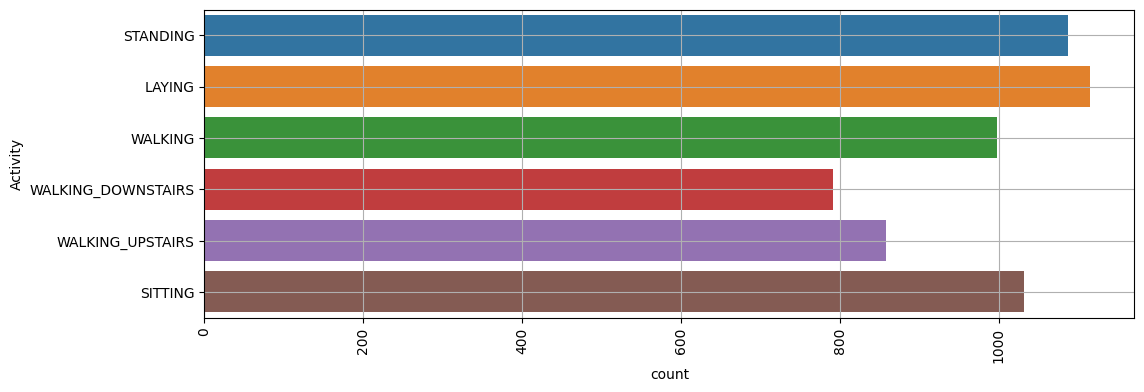

In [17]:
# | code-fold : true
plt.figure(figsize=(12,4))
sns.countplot(y=data[target])
plt.xticks(rotation=90)
plt.grid()
plt.show()

# 4. feature 확인

`-` train 데이터의 feature들을 그룹으로 묶어 정리한 데이터를 확인

## (1) feature 데이터 로드

In [18]:
features = pd.read_csv("f.csv")
features.head()

,sensor,agg,axis,feature_name
0,tBodyAcc,mean(),X,tBodyAcc-mean()-X
1,tBodyAcc,mean(),Y,tBodyAcc-mean()-Y
2,tBodyAcc,mean(),Z,tBodyAcc-mean()-Z
3,tBodyAcc,std(),X,tBodyAcc-std()-X
4,tBodyAcc,std(),Y,tBodyAcc-std()-Y


## (2) 고유값 확인

In [20]:
features.sensor.value_counts()

sensor
fBodyGyro               79
fBodyAcc                79
fBodyAccJerk            79
tBodyAcc                40
tBodyAccJerk            40
tBodyGyro               40
tBodyGyroJerk           40
tGravityAcc             40
fBodyBodyGyroJerkMag    13
fBodyBodyGyroMag        13
fBodyBodyAccJerkMag     13
fBodyAccMag             13
tBodyGyroJerkMag        13
tBodyGyroMag            13
tBodyAccJerkMag         13
tGravityAccMag          13
tBodyAccMag             13
angle                    7
Name: count, dtype: int64

In [21]:
features["feature_name"].value_counts()

feature_name
fBodyGyro-bandsEnergy()-25,32    3
fBodyGyro-bandsEnergy()-49,56    3
fBodyGyro-bandsEnergy()-25,48    3
fBodyGyro-bandsEnergy()-1,24     3
fBodyGyro-bandsEnergy()-49,64    3
                                ..
tBodyGyroJerk-min()-X            1
tBodyGyroJerk-max()-Z            1
tBodyGyroJerk-max()-Y            1
tBodyGyroJerk-max()-X            1
angle(Z,gravityMean)             1
Name: count, Length: 533, dtype: int64

In [22]:
features["agg"].value_counts()

agg
bandsEnergy()        126
arCoeff()             60
mean()                33
mad()                 33
max()                 33
min()                 33
energy()              33
iqr()                 33
entropy()             33
std()                 33
sma()                 17
correlation()         15
meanFreq()            13
kurtosis()            13
skewness()            13
maxInds               13
arCoeff()3             5
arCoeff()4             5
arCoeff()2             5
arCoeff()1             5
tBodyAccMean           1
tBodyAccJerkMean       1
tBodyGyroMean          1
tBodyGyroJerkMean      1
X                      1
Y                      1
Z                      1
Name: count, dtype: int64

In [24]:
features["axis"].value_counts()

axis
X              76
Y              76
Z              76
gravityMean     6
X,2             5
               ..
25,32.1         2
17,24.1         2
1,8.1           2
9,16.1          2
gravity         1
Name: count, Length: 62, dtype: int64

# 5. AI 모델링

## (0) 데이터 셋 나누기

In [30]:
y = data[target]
x = data.drop(target, axis = 1)

x_train, x_val, y_train, y_val = train_test_split(x,y, test_size = 0.3, random_state = 2023)      

`-` 각 모델의 비교를 위한 데이터 프레임 생성

In [33]:
model_name = []
valid_data = []
accuracy_score = []
F1_score = []
result = pd.DataFrame([model_name,valid_data,accuracy_score,F1_score]).T
result.columns = ['model_name', 'valid_data', 'accuracy_score', 'F1_score']
result

,model_name,valid_data,accuracy_score,F1_score


## (1) SVM

In [27]:
from sklearn.svm import SVC

In [34]:
svc_model = SVC(random_state  = 2023)
svc_model.fit(x_train, y_train)
svc_pred = svc_model.predict(x_val)
#svc_pred

## (2) Logistic

In [35]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=2023)
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_val)

C:\Users\rkdcj\anaconda3\envs\dx\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [36]:
result.loc[1,:] = ['lr', 'train', np.mean(y_val == lr_pred), f1_score(y_val,lr_pred, average = "macro")]
result

,model_name,valid_data,accuracy_score,F1_score
1,lr,train,0.984136,0.985601


## (3) KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)
knn_pred = knn_model.predict(x_val)

In [39]:
result.loc[2] = ["knn","train",np.mean(knn_pred == y_val), f1_score(y_val,knn_pred, average = "macro")] 
result

,model_name,valid_data,accuracy_score,F1_score
1,lr,train,0.984136,0.985601
2,knn,train,0.954674,0.958345


## (4) GBM

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

In [41]:
gbc_model = GradientBoostingClassifier(random_state = 2023)
gbc_model.fit(x_train,y_train)
gbc_pred = gbc_model.predict(x_val)

In [42]:
result.loc[3] = ["gbc","train",np.mean(gbc_pred == y_val), f1_score(y_val, gbc_pred, average = "macro")]
result

,model_name,valid_data,accuracy_score,F1_score
1,lr,train,0.984136,0.985601
2,knn,train,0.954674,0.958345
3,gbc,train,0.981870,0.983141


## (5) XGB

In [44]:
from xgboost import XGBClassifier

dic = {'LAYING' : 2,
 'SITTING' : 1,
 'STANDING' : 0,
 'WALKING' : 3,
 'WALKING_DOWNSTAIRS' : 4,
 'WALKING_UPSTAIRS': 5}

y_train_map = [dic[i] for i in y_train]
y_val_map =  [dic[i] for i in y_val]                                                                     


xgb_model = XGBClassifier(learning_rate=0.2, max_depth=2, random_state=2023)

xgb_model.fit(x_train,y_train_map)

xgb_pred = xgb_model.predict(x_val)

result.loc[5] =  ["xgb", "train", np.mean(xgb_pred == y_val_map), f1_score(y_val_map, xgb_pred, average = "macro")]
result

,model_name,valid_data,accuracy_score,F1_score
1,lr,train,0.984136,0.985601
2,knn,train,0.954674,0.958345
3,gbc,train,0.981870,0.983141
5,xgb,train,0.990368,0.991178


# 5. 결과 저장 및 시각화

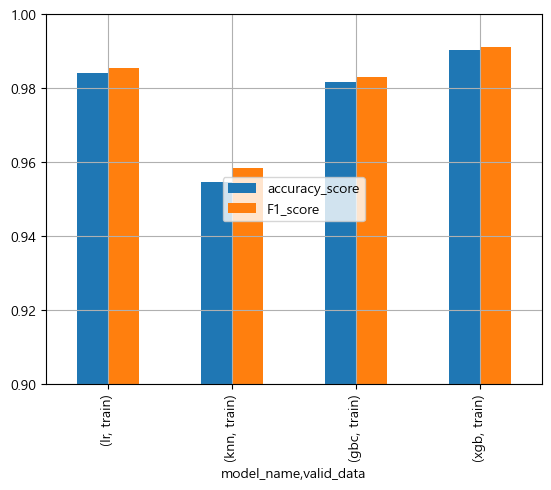

In [45]:
result.to_csv("result3.csv", index = False)

save_check = pd.read_csv("result3.csv")


result_comp = save_check.set_index(["model_name", "valid_data"])

result_comp.plot(kind="bar",ylim = [0.9, 1.0])
plt.legend(loc="center")
plt.grid()
plt.show()

`-` XGB 모델의 성능이 가장 좋으므로 해당 모델을 튜닝하여 최종 모델링 수행